In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import pingouin as pg
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
wine_df=pd.read_csv("wineQT.csv",index_col="Id")

In [3]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [5]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


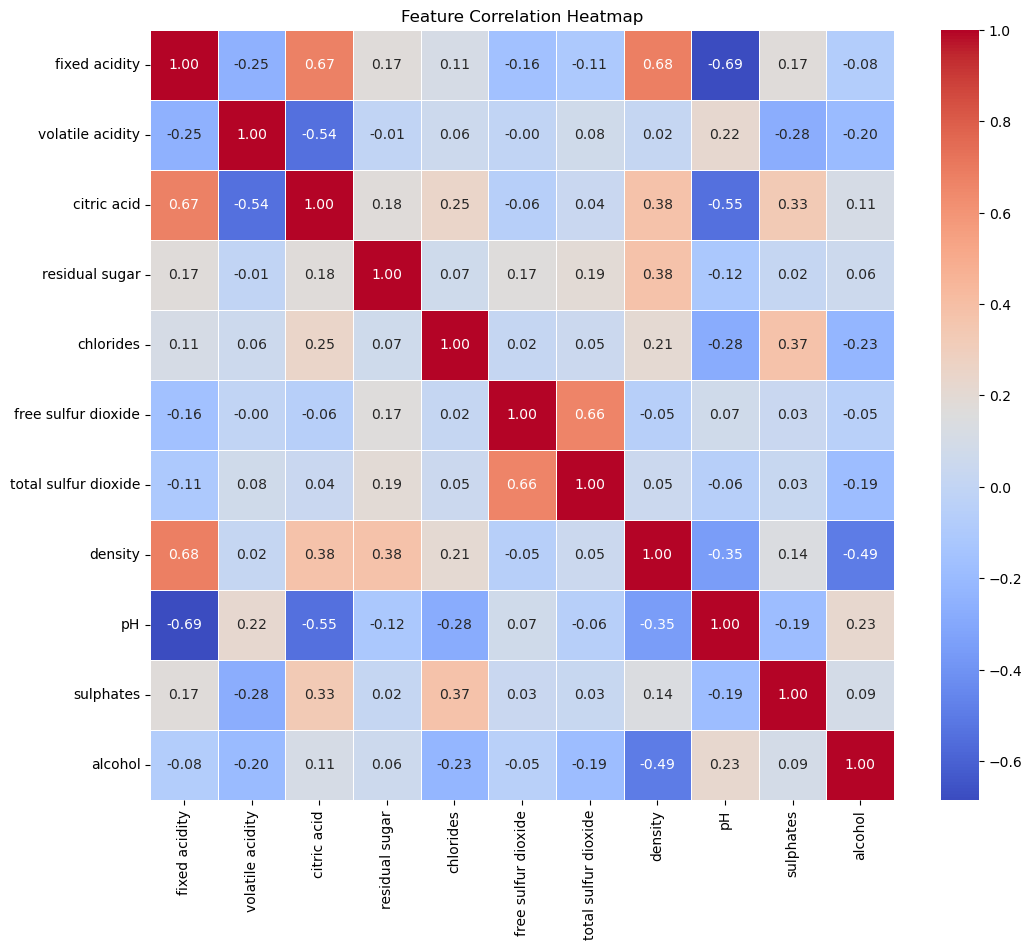

In [7]:
corr_matrix = wine_df.drop('quality', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']


In [9]:
scaler = StandardScaler()
#özelliklerin ortalamasını 0, standart sapmasını ise 1 yaparak veriyi standartlaştırır. Bu, her özelliğin aynı ölçekle değerlendirilmesini sağlar.
X_scaled = scaler.fit_transform(X)

In [30]:
print(X_scaled)
#burada eksi değerlerin oluşması çok saçma olur bunun için başka bir scaler bulmak mantıklı kaggleda minscaler kullanılşmış ama farklı bir tane denenebilir

[[-0.52157961  0.93933222 -1.36502663 ...  1.27069495 -0.57365783
  -0.96338181]
 [-0.29259344  1.94181282 -1.36502663 ... -0.70892755  0.1308811
  -0.59360107]
 [-0.29259344  1.27349242 -1.16156762 ... -0.32577481 -0.04525363
  -0.59360107]
 ...
 [-1.20853813  0.38239855 -0.9581086  ...  0.88754221 -0.45623467
   0.05351522]
 [-1.38027776  0.10393172 -0.8563791  ...  1.33455374  0.60057372
   0.70063152]
 [-1.38027776  0.6330187  -0.75464959 ...  1.65384769  0.30701583
  -0.22382033]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#SPLİT DATA TRAİNİNG VE TEST İÇİN

In [11]:
#TRAİNİNG VE TEST İÇİN EN İYİ K Yİ BULMA
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)





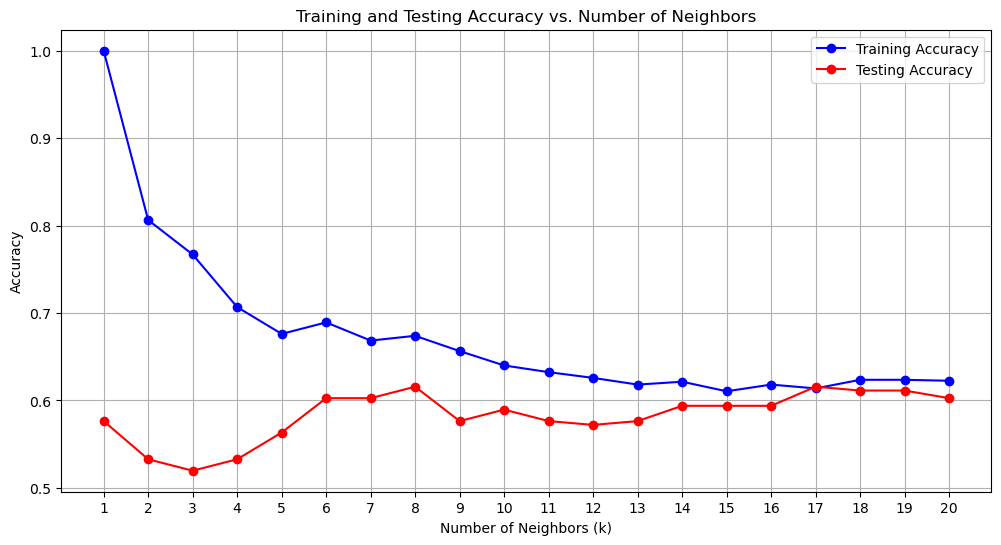

In [12]:
#TRAİNİNG VE TEST İÇİN EN İYİ K Yİ BULMA
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(k_values, test_accuracies, marker='o', label='Testing Accuracy', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [37]:
wine_x = wine_df.drop("quality", axis=1)
wine_y = wine_df["quality"]

# Chi-Kare ile özellik seçim işlemi
bestfeatures = SelectKBest(score_func=chi2, k='all')
dfit = bestfeatures.fit(wine_x, wine_y)


df_scores = pd.DataFrame(dfit.scores_, columns=['Score'])
df_cols = pd.DataFrame(wine_x.columns, columns=['Feature'])

# Özellikler ve skorları birleştirme
feature_importance = pd.concat([df_cols, df_scores], axis=1)

In [38]:
print(feature_importance.sort_values(by = 'Score',ascending = False))
#sulfur' ün qualitiye etkisi fazla, birbileri arasındada 0.66 güçlü bir corr(heatmap) var aykırı değerleri quality' i fazla etkileyebilir.

                 Feature        Score
6   total sulfur dioxide  1682.024087
5    free sulfur dioxide    89.928864
10               alcohol    34.172300
1       volatile acidity    12.074844
2            citric acid    11.891661
0          fixed acidity     7.813299
3         residual sugar     4.477750
9              sulphates     3.707313
4              chlorides     0.468700
8                     pH     0.151709
7                density     0.000154


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

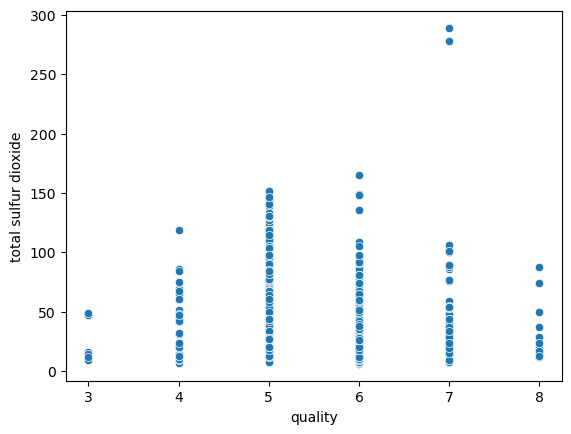

In [ ]:
sns.scatterplot(y="total sulfur dioxide",x="quality",data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

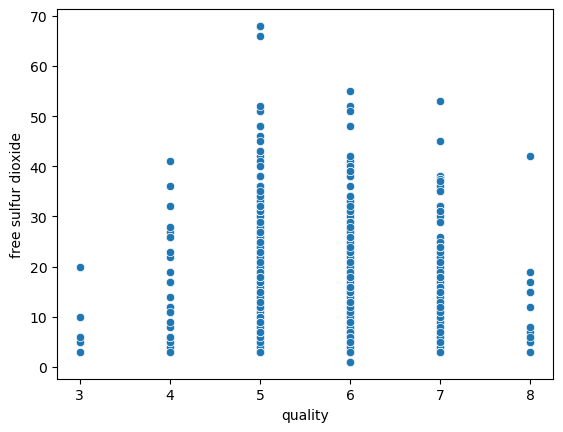

In [ ]:
sns.scatterplot(y="free sulfur dioxide",x="quality",data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

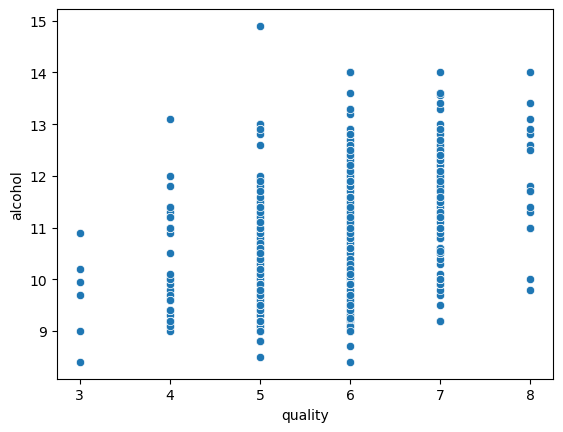

In [ ]:
sns.scatterplot(y="alcohol",x="quality",data=wine_df)

In [41]:
#scatterlarda aykırı değerler mevcut robust veya scaler denenebilir veya aykırı değerler çıkarılıp yeni bir model oluşturulabilir.
mscaler = MinMaxScaler()
X_mscaled = mscaler.fit_transform(X)

In [42]:
print(X_mscaled)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.14159292 0.32876712 0.08       ... 0.55905512 0.1497006  0.32307692]
 [0.11504425 0.29452055 0.1        ... 0.61417323 0.25748503 0.43076923]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_mscaled, y, test_size=0.2, random_state=42)

In [44]:
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)


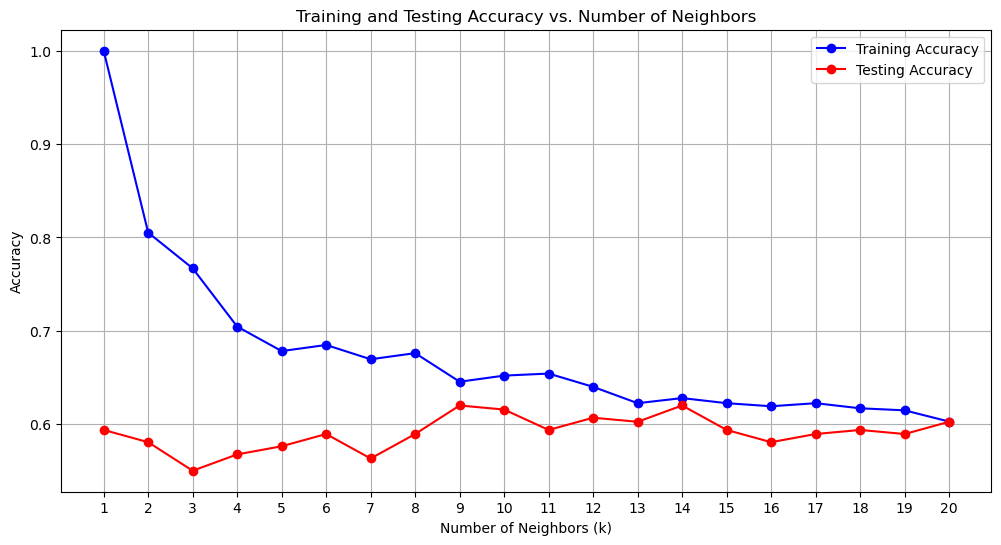

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(k_values, test_accuracies, marker='o', label='Testing Accuracy', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#minscalerda daha iyi sonuç veriyor ek olarak slfurlerde de aykırı değerler çıkarılabilir k=9 uggun olabilir